In [1]:
from ising.model import IsingModelND
import numpy as np
from ipywidgets import interact
from scipy import constants
from jax.config import config
import jax.numpy as jnp
import jax
from tqdm.auto import tqdm

config.update("jax_enable_x64", True)

%load_ext autoreload
%autoreload 2

/home/jeppe/Code/IsingModel/.venv/lib/python3.10/site-packages/jax/_src/config.py:171: UserWarning: enable_omnistaging() is a no-op in JAX versions 0.2.12 and higher;
see https://github.com/google/jax/blob/main/design_notes/omnistaging.md
  warnings.warn(


(32, 32, 32)
Doing 25000 MCMC steps


  0%|          | 0/250 [00:00<?, ?it/s]

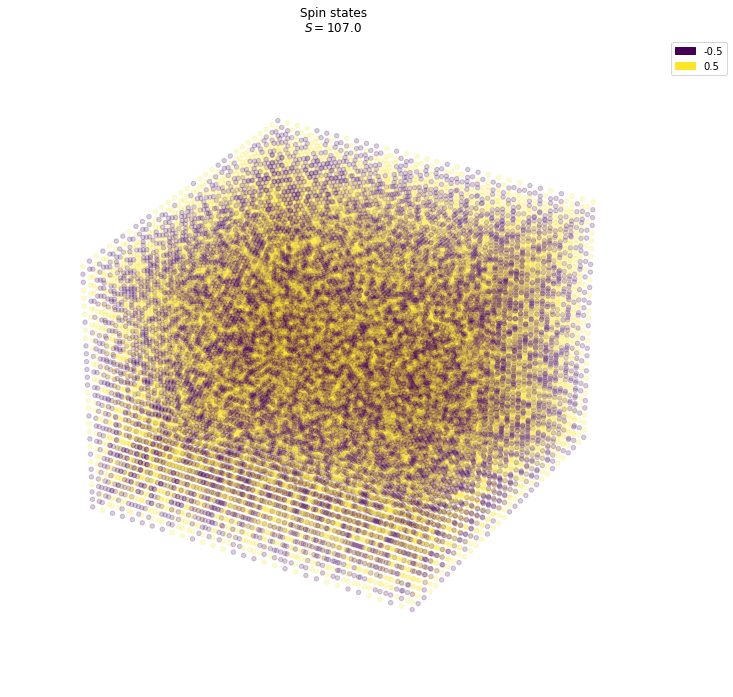

interactive(children=(IntSlider(value=124, description='i', max=249), Output()), _dom_classes=('widget-interac…

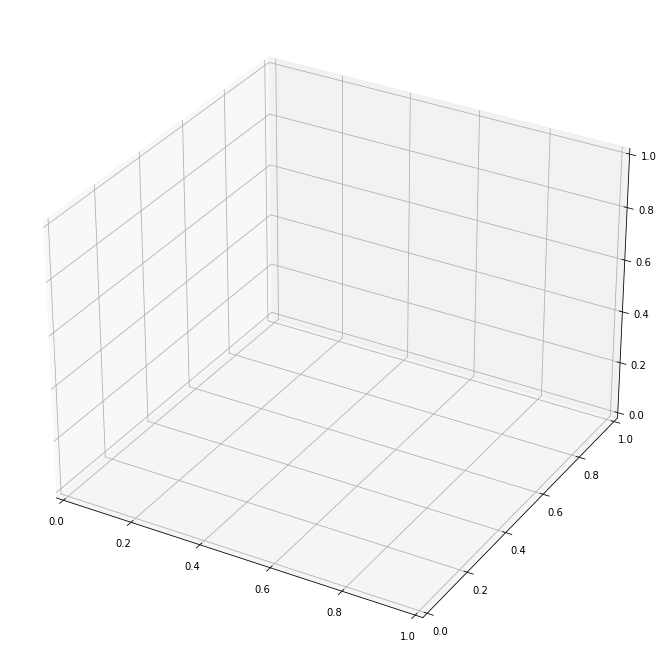

In [2]:
beta = 1.5
temperature = 1 / (constants.Boltzmann * beta)

model = IsingModelND(3, size=32, spin=1/2)
model.plot_state(model.initial_state)

all_states = []
steps_per_state = 100
num_states = 250
print(f"Doing {steps_per_state * num_states} MCMC steps")
states = model.initial_state
for n in tqdm(range(num_states)):
    states = model.run_steps(steps_per_state, (temperature, temperature * 2), initial_state_or_states=states)
    # states.append(model.state.copy())
    all_states.append(states)

@interact(value=0, min=0, max=len(all_states))
def update(i=(0, len(all_states) - 1)):
    model.plot_state(all_states[i][0])

In [3]:
all_states[10].shape
np.indices((32, 32, 32)).shape

(3, 32, 32, 32)

In [4]:
from ising import model as mmod
f = jax.grad(mmod.get_hamiltonian_delta)
f()

AttributeError: module 'ising.model' has no attribute 'get_hamiltonian_delta'